In [2]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

In [4]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [5]:
download(filepath, "laptops.csv")
file_name="laptops.csv"

In [6]:
df = pd.read_csv(file_name, header=0)

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


<h4>Regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price"</h4>

(0.0, 3974.15)

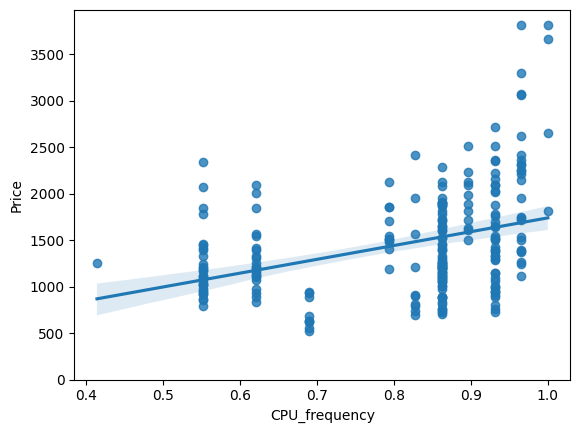

In [9]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

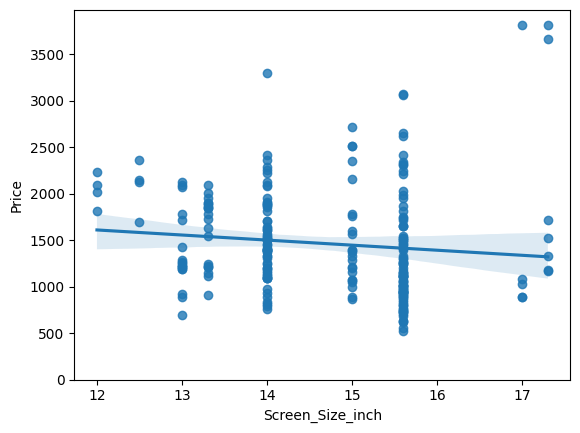

In [10]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

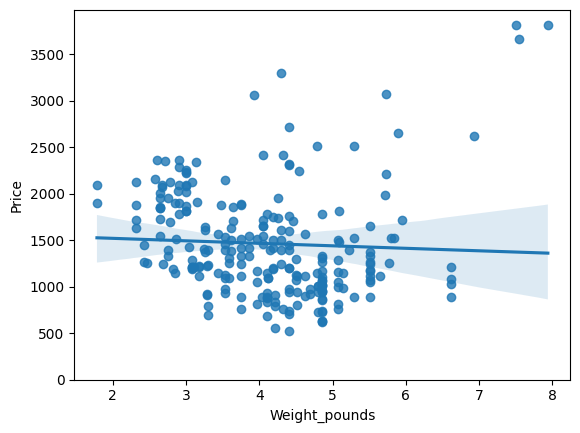

In [11]:
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)

In [17]:
# Correlation values of the three attributes with Price
for param in ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]:
    correlation = df[[param, "Price"]].corr().iloc[0, 1]
    print(f"Correlation of Price and {param} is {correlation:.6f}")

Correlation of Price and CPU_frequency is 0.366666
Correlation of Price and Screen_Size_inch is -0.110644
Correlation of Price and Weight_pounds is -0.050312


"CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.

<h4>Box plots for features "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"</h4>

<Axes: xlabel='Category', ylabel='Price'>

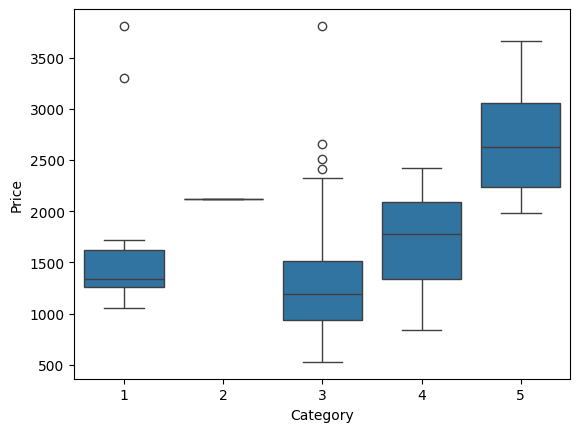

In [19]:
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

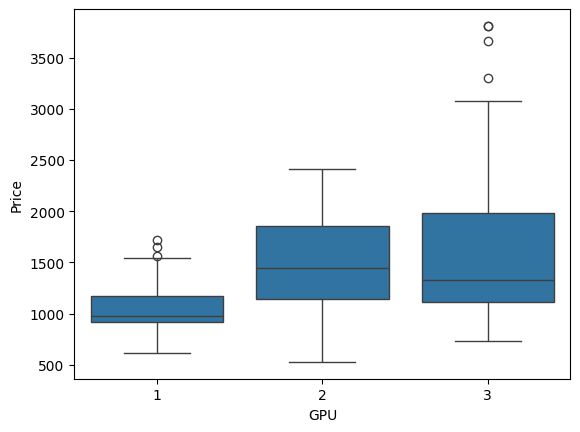

In [20]:
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

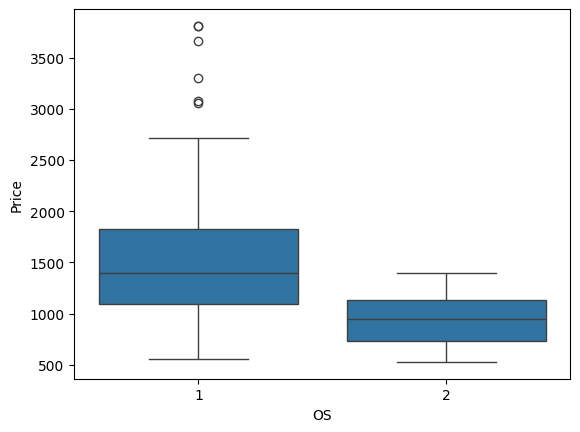

In [21]:
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

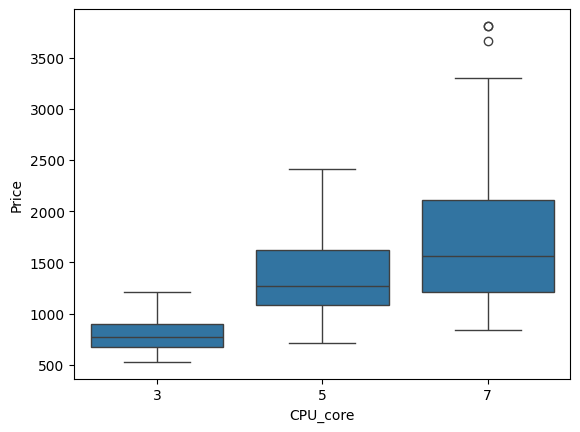

In [23]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

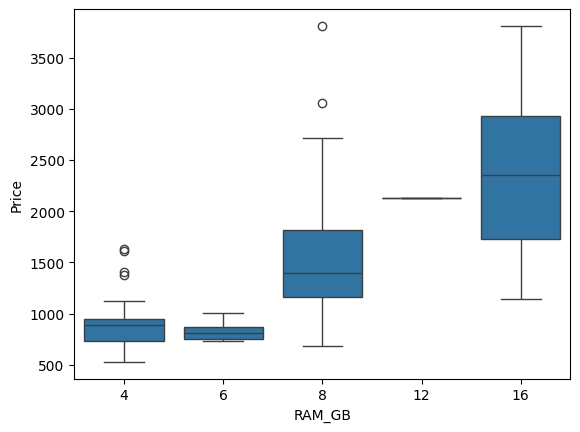

In [25]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

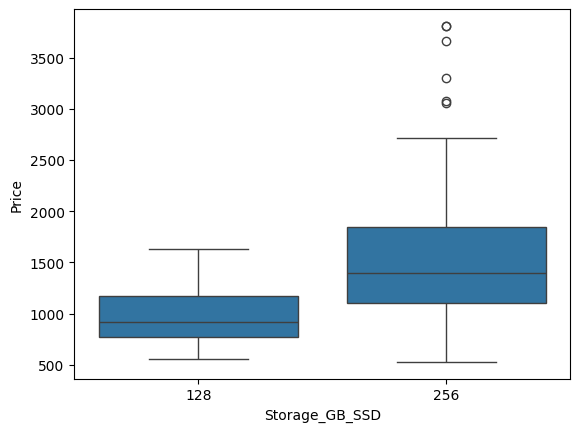

In [26]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

The statistical description of all the features being used in the data set, include "object" data types as well:

In [27]:
print(df.describe(include=['object']))

       Manufacturer Price-binned
count           238          238
unique           11            3
top            Dell          Low
freq             71          160


Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot:

In [32]:
df_gptest = df[['GPU','CPU_core','Price']]

# Create the group
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [31]:
# Create the Pivot table
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


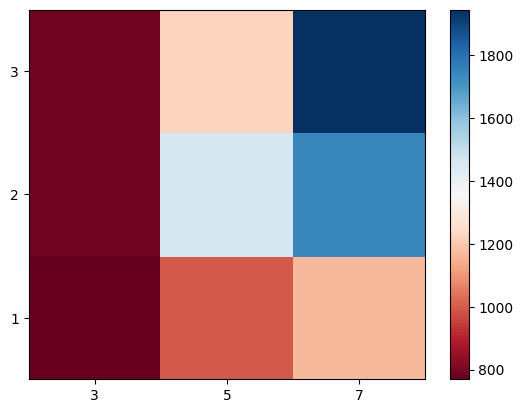

In [34]:
# Create the plot and axes
fig, ax = plt.subplots()  # Initialize the figure and axes for the plot

# Plot the heatmap using pcolor
im = ax.pcolor(grouped_pivot, cmap='RdBu')  # pcolor creates a heatmap, cmap='RdBu' is the color palette

# Get the labels for the axes
row_labels = grouped_pivot.columns.levels[1]  # Labels for the X axis (CPU_core), extracted from the columns of the pivot table
col_labels = grouped_pivot.index  # Labels for the Y axis (GPU), extracted from the index of the pivot table

# Move the ticks and labels to the center of the cells
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)  # Shift X axis labels to the center of cells
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)  # Shift Y axis labels to the center of cells

# Insert labels on the axes
ax.set_xticklabels(row_labels, minor=False)  # Set the labels for the X axis (CPU_core)
ax.set_yticklabels(col_labels, minor=False)  # Set the labels for the Y axis (GPU)

# Add the colorbar
fig.colorbar(im)  # Adds a colorbar to the side of the plot for value reference

The heatmap shows that the device price depends on two factors: GPU and CPU_core. As the values of GPU and CPU_core increase, the device price rises. This confirms that more powerful graphics cards and processors with more cores are typically more expensive.

<h4>Pearson Correlation and p-values</h4>

In [35]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.6815606288429595e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588615  with a P-value of P = 5.502463350713293e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810302  with a P-value of P = 0.00014898923191724214
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118273  with a P-value of P = 0.08853397846830753
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.050312258377515476  with a P-value of P = 0.4397693853433896
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355115  with a P-value of P = 7.912950127009037e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827384  with a P-value of P = 0.0005696642559246758
GPU
The Pearson Correlation Coefficient for  GPU  is 0.28829819888814273 